# Bar Charts and Analyzing Data from CSV's #
<hr style="height:0.4px">

### Basic Vertical Bar Chart ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))

width = 1/5

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

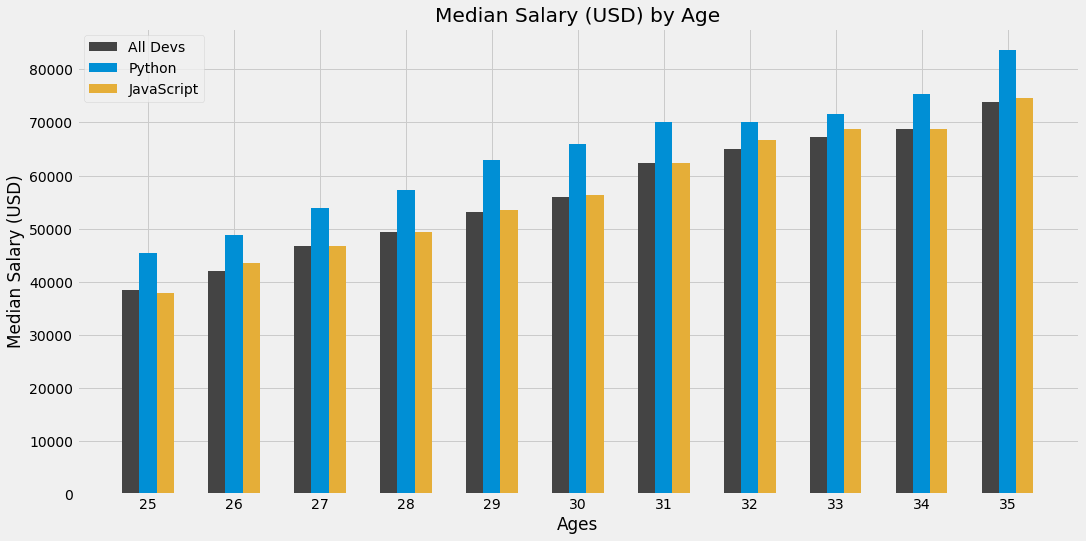

In [3]:
plt.style.use("fivethirtyeight")

plt.bar(x_indexes - width, dev_y, color="#444444", label="All Devs",width=width)

plt.bar(x_indexes, py_dev_y, color="#008fd5", label="Python",width=width)

plt.bar(x_indexes + width, js_dev_y, color="#e5ae38", label="JavaScript",width=width)

plt.legend()

plt.title("Median Salary (USD) by Age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.xticks(x_indexes,ages_x)

plt.show()

###  Analyzing CSV - Method 1 ###

In [4]:
import csv
from collections import Counter

In [5]:
with open('data (Part 2).csv') as f:
    csv_reader = csv.DictReader(f) # Reads from CSV -> Dict
    languages_counter = Counter() # To keep count of languages used 
    for c in csv_reader:
        lang_used = c['LanguagesWorkedWith'].split(';')
        languages_counter.update(lang_used)

languages_counter

Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

**Lets plot Top 10 languages**

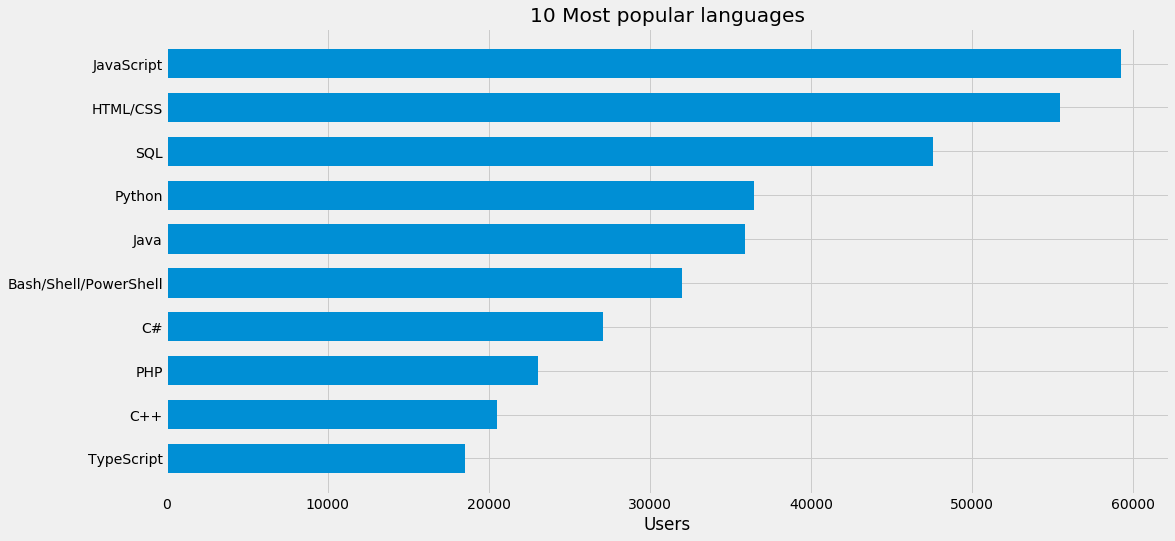

In [6]:
top10 = languages_counter.most_common(10)[::-1]
lang,count = [],[]
for t in top10:
    lang.append(t[0])
    count.append(t[1])

plt.barh(lang,count,height=2/3)
plt.xlabel('Users')
plt.title('10 Most popular languages')
plt.show()

### Analyzing CSV - Method 2 ###

In [7]:
import pandas as pd
from collections import Counter

data = pd.read_csv('data (Part 2).csv')
data.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [8]:
lang_used = data['LanguagesWorkedWith']

languages_counter= Counter()

for l in lang_used:
    languages_counter.update(l.split(';'))
    
languages_counter.most_common()

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833),
 ('Swift', 5744),
 ('Kotlin', 5620),
 ('R', 5048),
 ('VBA', 4781),
 ('Objective-C', 4191),
 ('Scala', 3309),
 ('Rust', 2794),
 ('Dart', 1683),
 ('Elixir', 1260),
 ('Clojure', 1254),
 ('WebAssembly', 1015),
 ('F#', 973),
 ('Erlang', 777)]

**Lets plot**

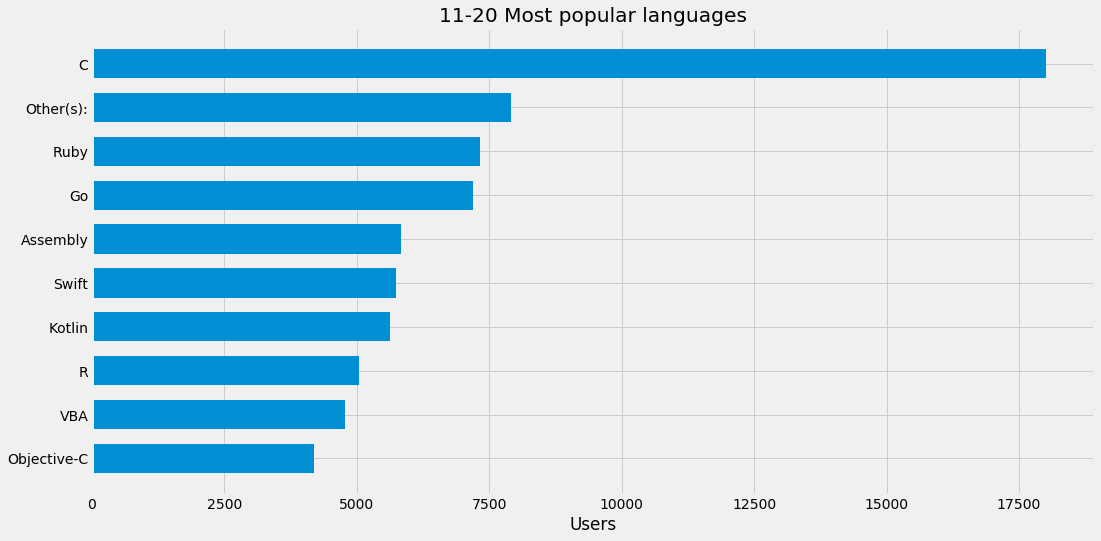

In [9]:
top10 = languages_counter.most_common()[10:20:][::-1]
lang,count = [],[]
for t in top10:
    lang.append(t[0])
    count.append(t[1])

plt.barh(lang,count,height=2/3)
plt.xlabel('Users')
plt.title('11-20 Most popular languages')
plt.show()